# Two Asset Portfolio Efficient Frontier

Let's start by loading the returns and generating the expected returns vector and the covariance matrix

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd

Folder="C:/Users/msugi/OneDrive/Desktop/DataScience/Courses/05. Investment Management & Machine Learning/01 Intro Portfolio Construction/Resources/data/"
filename4="ind30_m_vw_rets.csv"
Path4=Folder + filename4
   
ind = pd.read_csv(Path4, header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()
ind_sub= ind["1996":"2000"]
ind_sub.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1996-01,0.0342,0.0326,0.0182,0.0469,-0.0049,0.0285,-0.0236,0.0595,0.0543,-0.0392,...,0.0233,0.0143,0.0215,0.0121,-0.0012,-0.0065,-0.0146,0.0657,0.0393,0.0283
1996-02,0.0162,0.0561,0.0318,0.0179,0.0233,-0.0044,0.0187,-0.0107,0.0276,0.0024,...,-0.0220,0.0423,0.0677,-0.0104,0.0418,0.0294,0.0553,0.0342,0.0213,0.0151
1996-03,-0.0382,0.0190,-0.0768,0.0108,0.0027,0.0130,0.1149,0.0024,0.0588,0.0268,...,-0.0187,0.0157,-0.0460,0.0306,0.0326,0.0243,0.0825,0.0083,0.0096,0.0500
1996-04,-0.0032,-0.0089,-0.0160,0.0237,0.0285,0.0388,0.0541,-0.0060,-0.0087,0.0346,...,0.0270,0.0820,0.1056,0.0274,0.0265,0.0468,0.0436,0.0271,-0.0108,0.0269
1996-05,0.0550,0.0969,0.0548,0.0279,0.0349,0.0325,0.0805,0.0393,-0.0037,0.0577,...,0.0006,0.0352,0.0418,0.0144,-0.0028,0.0383,0.0511,0.0041,0.0141,0.0432


In [11]:
months=ind_sub.shape[0]
ind_sub_anual=(((ind_sub + 1).prod())**(12/months)-1).round(4)



In [12]:
cov = ind["1996":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


As a first exercise, let's assume we have some weights, and let's try and compute the returns and volatility of a portfolio, given a set of weights, returns, and a covariance matrix.

The returns are easy, so let's add this to our toolkit

```python

def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

```

The volatility is just as easy in matrix form:

```python
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5
```



In [13]:
# Calculate Portfolio Return

def portfolio_return(weights, returns):
    return (weights.T @ returns)

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5


# The 2-Asset Case

In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is 1-the weight of the first asset.

Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a _list comprehension_ ... which you can think of as an efficient way to generate a list of values instead of writing a for loop.

## Draw the Grids using List Comprehension

In [14]:
l = ["Games", "Fin"]

import pandas as pd
import numpy as np

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights 

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

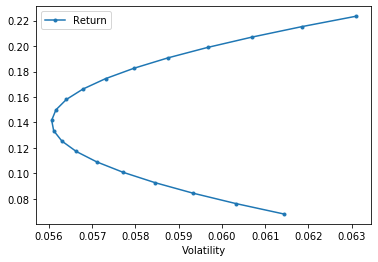

In [15]:
returns_2=[portfolio_return(w, ind_sub_anual[l]) for w in weights]
vol_2=[portfolio_vol(w, cov.loc[l, l]) for w in weights]
efficient_frontier_2 = pd.DataFrame({"Return": returns_2, "Volatility": vol_2})
import pandas as pd
efficient_frontier_2.plot.line(x="Volatility", y="Return", style=".-")

# Multi-Asset Portfolio Efficient Frontier

## <span style='color: blue;'> *__weight calculation__* </span>
The primary difference between "Two-Assets-Portfolio Efficient Frontier" and "Multi-Assets-Portfolio Efficient Frontier" is <span style='color: blue;'> *__weight calculation__* </span>. 


In order to plot the frontier for portfolios with more than 2 assets, we need to find the weights of the portfolio on the efficient frontier.

 We need to set the *__weights__* so that it minimizes the risk, or the volatility, of the portofolio.

Efficient Frontier draws the risk-return boundary of all possible portfolios. In other words, for a given target return, it will plot the minimum portfolio risk.

In this context, we need to define the function that generate the *__weights__* that yields the minimum portfolio risk to a given set of return targets.



## <span style='color: blue;'> *__Optimizer__* </span>
In order to search the *__weights__* that minimizes the portfolio risk, we can use *__scipy.optimize.minimize()__*

From: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
> Minimization of scalar function of one or more variables.

I will use *__quodratic optimizer__*. In order to do so, I will set 'method'=*__'SLSQP'__*.

From: https://stackoverflow.com/questions/19843752/structure-of-inputs-to-scipy-minimize-function
> "By default, scipy.optimize.minimize takes a function fun(x) that accepts one argument x (which might be an array or the like) and returns a scalar. scipy.optimize.minimize then finds an argument value xp such that fun(xp) is less than fun(x) for other values of x. The optimizer is responsible for creating values of x and passing them to fun for evaluation.
But what if you happen to have a function fun(x, y) that has some additional parameter y that needs to be passed in separately (but is considered a constant for the purposes of the optimization)? This is what the args tuple is for. The documentation tries to explain how the args tuple is used, but it can be a little hard to parse:
>>args: tuple, optional |
Extra arguments passed to the objective function and its derivatives (Jacobian, Hessian).

>Effectively, scipy.optimize.minimize will pass whatever is in args as the remainder of the arguments to fun, using the asterisk arguments notation: the function is then called as fun(x, *args) during optimization. The x portion is passed in by the optimizer, and the args tuple is given as the remaining arguments."


In [53]:
import numpy as np
from scipy.optimize import minimize

def weight_minimize_vol(target_return, exptected_return, cov):

#Generate 'weights' from a given 'target_returns'

# number of assets
    n = exptected_return.shape[0]
    print("n=", n)
# Set the Initial Value: let's start from the equal weight
    initial_weight=np.repeat(1/n, n)
    print("initial_weight=", initial_weight)
# Set the contraints
# 1) set the boundary: 0 < w < 1 for a sequence of bounds for every weight
    condition_1_boundary = ((0,1),)*n
    print("condition_1_boundary=", condition_1_boundary)
 

# Condition 2: check if the weights generates a portfolio that meets the target return

    condition_2_return = {'type': 'eq',
                          'args': (exptected_return,),
                          'fun': lambda weights, exptected_return:  target_return - portfolio_return(weights, exptected_return)
                         }

# Condition 3: check if the weights sum to 1:

    condition_3_weights_sum = {'type': 'eq',
                          'fun': lambda weights:  np.sum(weights)-1
                         }
    output = minimize(portfolio_vol, initial_weight, args=(cov,), method="SLSQP", 
                      constraints=(condition_2_return, condition_3_weights_sum), bounds = condition_1_boundary)
    return output.x

#options={'disp': false}


### Example 1: 
Now try witt two assets portfolio.

In [54]:
l

['Games', 'Fin']

First, calculate the weights that minimizes the portfolio risk.

In [55]:
w1=weight_minimize_vol(0.14, ind_sub_anual[l], cov.loc[l,l])
w1.round(4)

n= 2
initial_weight= [0.5 0.5]
condition_1_boundary= ((0, 1), (0, 1))


array([0.5374, 0.4626])

Next, we can calculate the minimum risk, the minimum volatility, corresponding to the given target return.

To do so, I just apply the normal volatility calculation to the weights.

In [56]:
portfolio_vol(w1, cov.loc[l,l]).round(4)

0.0561

## Plot Efficient Frontier for Multi-Asset Portfolio




In [59]:
# generate the grid of target_returns
return_grid = np.linspace(ind_sub_anual.min(), ind_sub_anual.max(), n_points)
return_grid

array([-0.0536    , -0.02895263, -0.00430526,  0.02034211,  0.04498947,
        0.06963684,  0.09428421,  0.11893158,  0.14357895,  0.16822632,
        0.19287368,  0.21752105,  0.24216842,  0.26681579,  0.29146316,
        0.31611053,  0.34075789,  0.36540526,  0.39005263,  0.4147    ])

Generate the list of weights for the portfolios on the efficient frontier. Call it *__weights_frontier!__*


In [62]:
weights_frontier=[weight_minimize_vol(target_return, ind_sub_anual, cov) for target_return in return_grid]
weights_frontier

n= 30
initial_weight= [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
condition_1_boundary= ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
n= 30
initial_weight= [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
condition_1_boundary=

[array([5.28049826e-15, 3.80251386e-15, 1.14352972e-14, 0.00000000e+00,
        0.00000000e+00, 6.76542156e-15, 9.32587341e-15, 0.00000000e+00,
        0.00000000e+00, 5.46649391e-08, 0.00000000e+00, 2.91433544e-15,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.44863027e-15,
        9.99999945e-01, 1.37459488e-14, 0.00000000e+00, 0.00000000e+00,
        1.92901251e-15, 4.93355357e-15, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.17561557e-16, 0.00000000e+00, 0.00000000e+00,
        6.73766598e-15, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.12429798e-02, 0.00000000e+00,
        1.32989896e-17, 4.13356870e-18, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.57948300e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.97436096e-17, 8.80988588e-18, 0.00000000e+00,
        2.04716861e-01, 1.53262604e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.77454248e-18, 7.32844485e-19, 3.24435810e-18,
        0.00000000e+00

Apply the *__weights_frontier__* to generate:
 * the expected return of the frontier portfolio
 * the volatility of the frontier portfolio
 

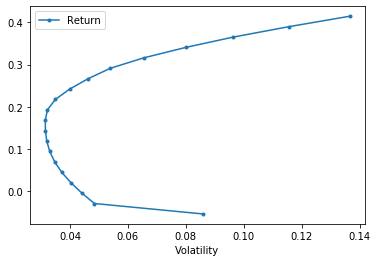

In [66]:
returns_3=[portfolio_return(w, ind_sub_anual) for w in weights_frontier]
vol_3=[portfolio_vol(w, cov) for w in weights_frontier]
efficient_frontier_3 = pd.DataFrame({"Return": returns_3, "Volatility": vol_3})
import pandas as pd
efficient_frontier_3.plot.line(x="Volatility", y="Return", style=".-")